In [1]:
!pip install numpy pandas matplotlib seaborn notebook



  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)

   ------------------------------ --------- 3/4 [isoduration]
   ---------------------------------------- 4/4 [isoduration]



In [4]:
# First, install the required packages
!pip install numpy pandas matplotlib seaborn

# Then import them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [14]:
df = pd.read_csv("C:\movie-analysis\imdb_top_1000.csv")
df.head()


,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,62.636,8.7,21456
1,1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,19.097,8.7,3652
2,2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,57.656,8.7,15990
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-11-30,41.077,8.6,12778
4,4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,1974-12-20,46.655,8.6,9640


In [15]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8560 entries, 0 to 8559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8560 non-null   int64  
 1   id            8560 non-null   int64  
 2   title         8560 non-null   object 
 3   overview      8556 non-null   object 
 4   release_date  8560 non-null   object 
 5   popularity    8560 non-null   float64
 6   vote_average  8560 non-null   float64
 7   vote_count    8560 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 535.1+ KB


,Unnamed: 0,id,popularity,vote_average,vote_count
count,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000
mean,4279.500000,157408.189252,34.483893,6.803832,1663.763201
std,2471.203485,210035.646543,259.280939,0.632387,2777.837511
min,0.000000,6.000000,0.600000,5.700000,198.000000
25%,2139.750000,9827.250000,8.350000,6.300000,327.000000
50%,4279.500000,25923.500000,11.703000,6.700000,625.000000
75%,6419.250000,303497.750000,21.335250,7.300000,1619.250000
max,8559.000000,928381.000000,11288.261000,8.700000,31575.000000


Missing values after cleaning:
 id              0
title           0
overview        0
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64

Top 5 movies:
                          title  vote_average  vote_count
0     The Shawshank Redemption           8.7       21456
1  Dilwale Dulhania Le Jayenge           8.7        3652
2                The Godfather           8.7       15990
3             Schindler's List           8.6       12778
4       The Godfather: Part II           8.6        9640

Descriptive stats:
          popularity  vote_average    vote_count
count   8560.000000   8560.000000   8560.000000
mean      34.483893      6.803832   1663.763201
std      259.280939      0.632387   2777.837511
min        0.600000      5.700000    198.000000
25%        8.350000      6.300000    327.000000
50%       11.703000      6.700000    625.000000
75%       21.335250      7.300000   1619.250000
max    11288.261000      8.700000  31575.000000


C:\Users\megha\AppData\Local\Temp\ipykernel_5088\4149631094.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average', y='title', data=top_movies, palette='viridis')


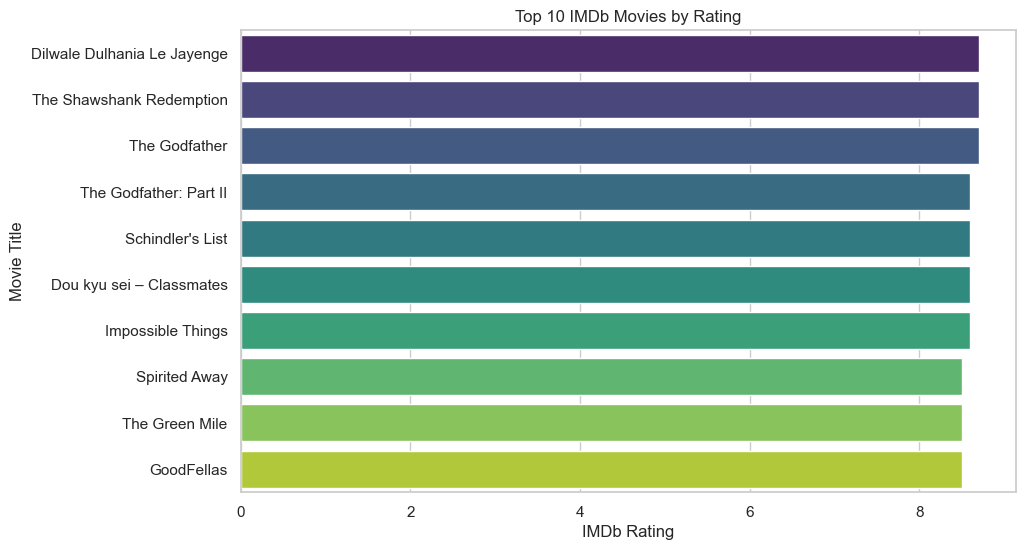

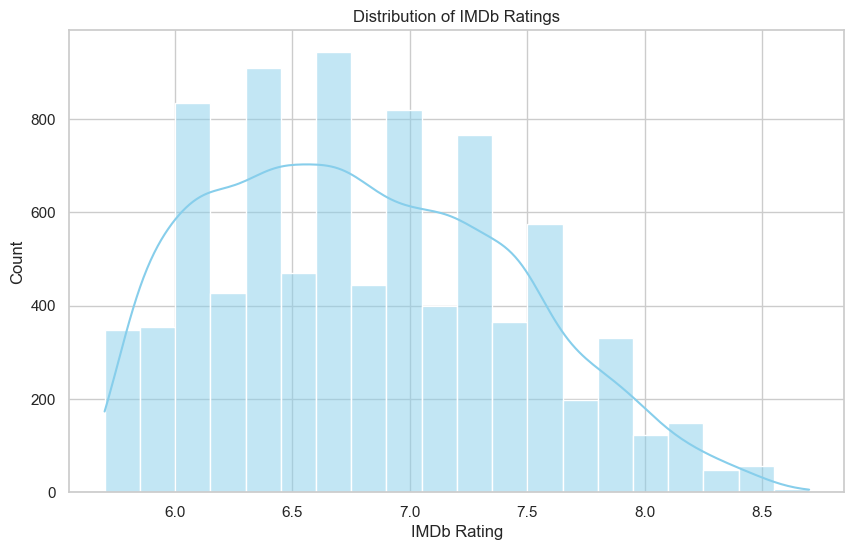

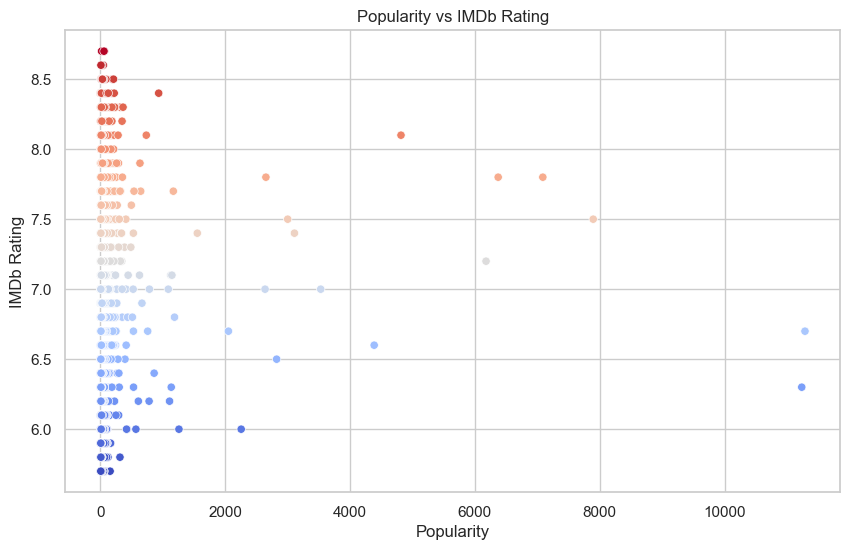

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

df = pd.read_csv(r"C:\movie-analysis\imdb_top_1000.csv")

# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)


df['overview'] = df['overview'].fillna('No description')

# Fill missing 'vote_average' with mean rating
df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())

# Check for missing values
print("Missing values after cleaning:\n", df.isnull().sum())

# -------------------------------
# 3️⃣ Basic Data Exploration
# -------------------------------
# Top 5 movies
print("\nTop 5 movies:\n", df[['title', 'vote_average', 'vote_count']].head())

# Descriptive statistics
print("\nDescriptive stats:\n", df[['popularity','vote_average','vote_count']].describe())


top_movies = df.sort_values(by='vote_average', ascending=False).head(10)

sns.barplot(x='vote_average', y='title', data=top_movies, palette='viridis')
plt.title('Top 10 IMDb Movies by Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.show()


sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.show()

# Popularity vs Rating scatter
sns.scatterplot(x='popularity', y='vote_average', data=df, hue='vote_average', palette='coolwarm', legend=False)
plt.title('Popularity vs IMDb Rating')
plt.xlabel('Popularity')
plt.ylabel('IMDb Rating')
plt.show()



In [ ]:
df.to_csv("cleaned_imdb.csv", index=False)
